In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
# %load lotto.py
#!/usr/bin/python

import sys
import pandas as pd
from zip import unzip
from network import dl_file
from reader import read_csv, read_last_line
from pprint import pprint

# variables
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)

# read csv
#read_last_line(data_path, file_name)
#read_csv(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


In [19]:
reader = pd.read_csv(data_path + file_name + ".csv")
reader.set_index("DRAW NUMBER", inplace=True)
reader.head()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
1,649,0,1982-06-12,3,11,12,14,41,43,13
2,649,0,1982-06-19,8,33,36,37,39,41,9
3,649,0,1982-06-26,1,6,23,24,27,39,34
4,649,0,1982-07-03,3,9,10,13,20,43,34
5,649,0,1982-07-10,5,14,21,31,34,47,45


In [25]:
reader2 = reader[["NUMBER DRAWN 1","NUMBER DRAWN 2","NUMBER DRAWN 3","NUMBER DRAWN 4","NUMBER DRAWN 5","NUMBER DRAWN 6"]]
reader2.head()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
1,3,11,12,14,41,43
2,8,33,36,37,39,41
3,1,6,23,24,27,39
4,3,9,10,13,20,43
5,5,14,21,31,34,47


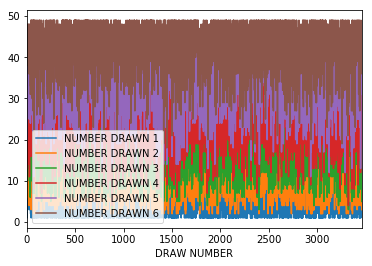

In [26]:
reader2.plot()
plt.show()

In [39]:
draw_one = reader[["NUMBER DRAWN 1"]]
draw_one.head()

,NUMBER DRAWN 1
DRAW NUMBER,
1,3
2,8
3,1
4,3
5,5


In [35]:
# one way
(draw_one == 16).sum()

NUMBER DRAWN 1    64
dtype: int64

In [38]:
# another way
draw_one[draw_one == 16].count()

NUMBER DRAWN 1    64
dtype: int64

In [49]:
# store min
min = draw_one.min()
min

NUMBER DRAWN 1    1
dtype: int64

In [54]:
# store max
max = draw_one.max()
max

NUMBER DRAWN 1    38
dtype: int64

In [61]:
draw_one['NUMBER DRAWN 1'].value_counts()

1     414
2     382
4     337
3     335
5     254
6     226
7     223
9     183
8     182
10    145
11    138
12    119
13     99
14     70
15     65
16     64
17     52
18     44
20     41
19     39
21     26
23     26
22     16
24     12
26     10
27      9
28      6
25      5
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

In [68]:
for column in reader2.columns:
    print(reader2[column].value_counts())

1     414
2     382
4     337
3     335
5     254
6     226
7     223
9     183
8     182
10    145
11    138
12    119
13     99
14     70
15     65
16     64
17     52
18     44
20     41
19     39
21     26
23     26
22     16
24     12
26     10
27      9
28      6
25      5
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64
12    187
8     183
10    177
7     172
9     171
13    171
14    169
15    169
11    157
16    155
17    153
5     148
6     147
20    131
18    125
19    123
21    121
4      96
22     91
3      90
23     78
24     78
26     65
25     57
27     49
2      46
29     46
28     42
30     39
32     26
31     19
33     13
35     11
34     11
36      4
37      4
38      3
39      3
40      2
43      1
41      1
42      1
Name: NUMBER DRAWN 2, dtype: int64
22    172
23    165
20    162
21    156
19    155
25    153
24    153
17    150
18    144
16    136
26    129
15    128
29    123
27    122
14    112
13    109
28    106
